<a href="https://colab.research.google.com/github/tyler274/cs101/blob/main/tport_CS101_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BEFORE YOU START:  Note that while you can execute cells in this notebook, you do not have permission to save the changed notebook.  (If we gave you permission, everybody's edits would interfere!).  So go to the "File" pull-down menu and choose "save a copy in Drive".  This will make a file "Copy of Homework #2.ipynb" in your Colab Notebooks directory in your Google Drive account, and that notebook will probably open in your browser automatically, depending on how you have things set up.  Rename to "Homework #2 - [your name].ipynb".  You can save your edits now.  To turn in the homework, you will use the Share menu in the upper right to give Edit privileges to gmatt.cook@gmail.com and to winfree@caltech.edu.  We will do the gradding by adding comments or text or commands.

---
### Here are the basic principles of this homework:
(1)  You will implement the exclusion process at a low level, getting your hands dirty with the fundamentals.

(2)  It doesn't matter if you write cool "Pythonic" code or not.  We are _only_ using Python/Colab, because (A) you probably already know a bit of Python (and if you don't, it's easy), (B) it's easy to give you usable code snippets, and (C) it's easy for us to try out your code.  We are *not* using Python/Colab because we want you to write great Pythonic code -- we don't care one way or the other about that.  We only care if you correctly implement the exclusion process on networks of relations.  Feel free to use whatever coding style is easiest for you.

(3)  The goal is to become familiar with _coding_ the exclusion process.  You will (A) program it at a low level (proceeding exclusion by exclusion), and (B) see your code in action.  (We provide a bit of visualization code to help with that.)

---
### More specifically, in this homework you will: <br> (1) Write some code to help with defining relations <br> (2) Create a big network for an empty Sudoku puzzle out of little relations of size at most 3 <br> (3) Code up the exclusion process <br> (4) Apply your code to actual Sudoku puzzles
---

# Quick little Python cheat sheet (in case you're not very familiar with Python)

Python is not a hard language to learn.
<br>
It is one of the few languages that was actually designed specifically to not be hard to learn.
<br>
Also, it has been around for 30 years, so any question you might have, the internet probably has an answer to.

Make sure you understand the following tidbits of Python code.  Shift-Return executes a cell.

In [ ]:
[k for k in range(1,9) if k%2==1]    # notice the range includes 1 but not 9    # k%2 means "k mod 2", i.e., either 0 or 1

[1, 3, 5, 7]

In [ ]:
a = [1,3,5,7]
print("example A:", a[2])    #  accessing an element of a list
print("example B:", a[0])    #  the first element of a list
print("example C:", a[-1])   #  the last element of a list
print("example D:", a[1:3])  #  elements in positions 1 (included) to 3 (not included)
print("example E:", a[1:])   #  all elements but the first
print("example F:", a[1:5:2])#  elements 1 (included) to 5 (not included) in steps of 2
a[1]=33                      #  changing an element of a list
print("example G:", a)
del a                        #  undefines a

example A: 5
example B: 1
example C: 7
example D: [3, 5]
example E: [3, 5, 7]
example F: [3, 7]
example G: [1, 33, 5, 7]


In [ ]:
[2,3,4] + [25,26,27]

[2, 3, 4, 25, 26, 27]

In [ ]:
[ (i,j) for i in range(3) for j in ["A", "B"] ]     # here the result is one list, and j is the inner loop

[(0, 'A'), (0, 'B'), (1, 'A'), (1, 'B'), (2, 'A'), (2, 'B')]

In [ ]:
[[ (i,j) for i in range(3) ] for j in ["A", "B"] ]  # here the result is a list of lists, and i is the inner loop

[[(0, 'A'), (1, 'A'), (2, 'A')], [(0, 'B'), (1, 'B'), (2, 'B')]]

In [ ]:
for (i,j) in zip([1,2,3],[4,5,6]) :    # the zip() lets (i,j) iterate in parallel through the two lists
  print("(i,j) = (", i, ",", j, ")", sep='')    # sep='' tells print to not put spaces between items

(i,j) = (1,4)
(i,j) = (2,5)
(i,j) = (3,6)


In [ ]:
for (i,j) in zip([1,2,3],[4,5,6]) :    # the zip() lets (i,j) iterate in parallel through the two lists
  print(f"(i,j) = ({i},{j})")          # an "f-string" evaluates and stringifies the parts inside {}

(i,j) = (1,4)
(i,j) = (2,5)
(i,j) = (3,6)


In [ ]:
print(1,2,(3,4),5,6)
print(1,2,*(3,4),5,6)                  # the * means that the tuple should be used as multiple arguments

1 2 (3, 4) 5 6
1 2 3 4 5 6


In [ ]:
set([5,7,9,7,7,5])                  # returns a set containing these things, duplicates are removed

{5, 7, 9}

In [ ]:
set([4,5,6]).union([6,7,8])         # take the union of a set (here constructed from an iterable) and any iterable object

{4, 5, 6, 7, 8}

In [ ]:
set([4,5,6]).intersection([5,6,7])  # take the intersection

{5, 6}

In [ ]:
d = {var: pos for pos, var in enumerate(['a', 'bc', 'd'])}   # this creates a dictionary
print(d)
print(type(d))
del d

{'a': 0, 'bc': 1, 'd': 2}
<class 'dict'>


In [ ]:
a = [[2,3,4], [5,6,7], [8,9,10], [11,12,13], [14,15,16], [17,18,19]]
b = a[1:]
b.remove([8,9,10])  # find the first instance of this in the list, and remove it
print(b)
b.pop(2)            # remove the element at index 2
print(b)
print(a)
c = a[1]
c[1] = 999          # this changes a too!
print(a)
del a,b,c

[[5, 6, 7], [11, 12, 13], [14, 15, 16], [17, 18, 19]]
[[5, 6, 7], [11, 12, 13], [17, 18, 19]]
[[2, 3, 4], [5, 6, 7], [8, 9, 10], [11, 12, 13], [14, 15, 16], [17, 18, 19]]
[[2, 3, 4], [5, 999, 7], [8, 9, 10], [11, 12, 13], [14, 15, 16], [17, 18, 19]]


In [ ]:
a=[2,3,4,5,6]
b=a                      # now b and a point to the same list
b[:] = ['a', 'b', 'c']   # this updates the contents of that list
print(a)
del a,b

['a', 'b', 'c']


In [ ]:
def no_change_list(some_list) :
  some_list = ['a', 'b', 'c']           # this makes some_list point to a different list
                                        # whatever it used to point to is now hard to find
  print("no:  inside no_change_list(), some_list is now", some_list)

a = [2,3,4,5,6]
no_change_list(a)
print("no:  after no_change_list(), a is", a)

a = 5
no_change_list(a)
print("no:  after no_change_list(), a is", a)

def change_list(some_list) :
  some_list[:] = ['a', 'b', 'c']        # this changes the contents of the list some_list points to
  print("yes:  inside change_list(), some_list is now", some_list)

a = [2,3,4,5,6]
change_list(a)
print("yes:  after change_list(), a is", a)

a = 5
change_list(a) # generates an error when trying to change the list contents, because 5 is not a list
print("yes:  after change_list(), a is", a)

no:  inside no_change_list(), some_list is now ['a', 'b', 'c']
no:  after no_change_list(), a is [2, 3, 4, 5, 6]
no:  inside no_change_list(), some_list is now ['a', 'b', 'c']
no:  after no_change_list(), a is 5
yes:  inside change_list(), some_list is now ['a', 'b', 'c']
yes:  after change_list(), a is ['a', 'b', 'c']


TypeError: ignored

In [ ]:
del a, change_list, no_change_list

In [ ]:
arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for i,e in enumerate(arr) :
  if i%5 == 3 : del arr[i]
print(arr)                      # missing 3 and 9 and 15

arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for i,e in reversed(list(enumerate(arr))) :
  if i%5 == 3 : del arr[i]
print(arr)                      # missing 3 and 8 and 13 and 18
del arr

[0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20]
[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20]


In [ ]:
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


The version number (currently 3.7) is important because if you look on the web for python features, some of the things you will find may only work in later versions of python (like 3.8 or 3.10), so they won't work here.

Note that in this colab jupyter notebook, you can use mathjax (LaTeX syntax) in text boxes,
<br>
for when you want to talk about things like $\frac{\sqrt{1+x^2}}{\det\begin{bmatrix}a & b\\c & d\end{bmatrix}}$.

# <font color=purple> (Part 1) Write some code to help with defining relations </font>

#### The format we will use to describe a network

A relation will be given as the rows of the relation's table, starting with the headings:

  *  The first entry is a list of variable names, which must be strings.
  *  The remaining entries give the combinations of values that the relation accepts.
  *  Any type of value is ok, for the possible variable values.

```
Example:
  The "exactly one" relation, applied to wires 'x', 'y', and 'z':
    [['x', 'y', 'z'],
      [ 0 ,  0 ,  1 ],
      [ 0 ,  1 ,  0 ],
      [ 1 ,  0 ,  0 ] ]
```
```
Example:
  A relation applied to variables 'temp', 'state', and 'material':
    [[ 'temp' , 'state' , 'material'],
      [ 'cold' , 'solid' , 'h2o'     ],
      [ 'cold' , 'liquid', 'h2o'     ],
      [ 'warm' , 'liquid', 'h2o'     ],
      [ 'hot'  , 'liquid', 'h2o'     ],
      [ 'hot'  , 'gas'   , 'h2o'     ],
      [ 'cold' , 'liquid', 'hg'      ],
      [ 'warm' , 'liquid', 'hg'      ],
      [ 'hot'  , 'liquid', 'hg'      ] ]
```


A network will be given as just a list of relations.

  *  The wires are defined implicitly, via the variable names.
  *  Each variable name is the name of a wire that goes to all the relations that use that variable.

---
### Let's make it easy to create relations

Here we define a helper function that can create an "exactly one" relation on whatever 3 wires we give it:

In [ ]:
def EXACTLY_ONE(w1, w2, w3):
  """The "exactly one" relation on 3 wires, accepting tuples with exactly one '1'."""
  return [ [w1, w2, w3],  # those are the wire names, passed in as args
          [0,0,1], [0,1,0], [1,0,0] ]  # the acceptable tuples

_(If you are a Python purist and all-caps makes you upset if it's not for a constant, don't worry, we are only doing this for functions that make relations.)_

Here is an example of how we could use that function to create an "exactly one" relation on the variables 'x', 'y', and 'z'.

In [ ]:
EXACTLY_ONE('x','y','z')

[['x', 'y', 'z'], [0, 0, 1], [0, 1, 0], [1, 0, 0]]

### Part 1 (a, b, c, d, e, f, g, h)

Now make a helper function called NOT, to make a relation that asserts that two Boolean (0/1) variables are unequal.

In [ ]:
# ENTER YOUR FUNCTION HERE

Also make a helper function called EQUALS, to make a relation that asserts that two Boolean (0/1) variables are the same.  You might surprise yourself by actually wanting to use this later on!

In [ ]:
# ENTER YOUR FUNCTION HERE

Now make a helper function called IS_ONE for the relation on a single variable that asserts that the value of the variable is 1.

Also make IS_ZERO.

In [ ]:
# ENTER THESE TWO FUNCTIONS HERE

Now you can define a helper function called NAND_GATE for the relation on 3 wires that corresponds to a NAND gate.

Also make AND_GATE, OR_GATE, and XOR_GATE.

In [ ]:
# ENTER THESE FOUR FUNCTIONS HERE

# <font color=purple> (Part 2) Create a big Sudoku puzzle network out of little relations of size at most 3 </font>

### For Sudoku, we will want to be able to talk about cell-specific variables



There are many ways to describe a Sudoku puzzle in terms of constraints.

Here, our goal will be to create a network of relations that has a fairly repetitive, grid-like structure, matching the Sudoku grid.

For example, instead of using a 1-of-9 relation that is a "global" relation spanning the entire width of a row (say to implement the constraint that a 5 should appear in one of the 9 positions in the top row), we will instead implement the 1-of-9 relation with a network of 1-of-3 and NOT relations, in a way that allows us to lay out the network so that all relations act only locally in the grid (within a cell or between a cell and its neighbor).

To make a big network that has a repeating grid-like structure, we will need relations and variables at every position in the grid.  That's a lot of variable names.

Luckily, a variable name is just any old string.  So the variable name can include something like ..." at (3,1)" at the end of the string to indicate that it is a variable being used at column 3, row 1.

Here is a helper function to help create variable names we will need for describing Sudoku.

In [ ]:
def factoid_var_name(digit, property, column, row):
  """Creates a variable name regarding the digit k at position (x,y) of a Sudoku problem"""
  return f'digit {digit} {property} ({column},{row})'

In [ ]:
factoid_var_name(5, "is at", 3,1)

'digit 5 is at (3,1)'

That string is the [lengthy] name of a variable that can be true or false (1 or 0).  At least it is clear what it means.  If it's True, then there is a 5 in the box in the 3rd column, 1st row.  If it's False, then there is some other digit at that location.

The 9x9x9 = 729 variables of this form (the `"is at"` form) will be used (by some code we provide below) for displaying the state of the sudoku.  Any other variable names, however, are up to you.

You will probably want to have several variables per grid cell.

Here is an example of another 0/1 variable you might or might not want to have in that cell:

In [ ]:
factoid_var_name(5, "is to the left of", 3, 1)

'digit 5 is to the left of (3,1)'

That is a boolean variable:  It is 1 if the 5 in the first row is in columns 1 or 2, and it is 0 if the 5 in the first row is in column 3 or later.

### --- Part 2 (a) --- Design a network to implement 1-of-9 with 1-of-3

The "1 of 9" relation is very important for Sudoku.

It is possible to implement the 1-of-9 relation using some 1-of-3 relations (also known as the "exactly one" relation) and some NOT relations.  Can you figure out how to do it?  You will need this later.

(Note: You can make a NOT relation using a couple of EXACTLY_ONE relations, so that's why it's ok to use NOT relations even if your goal would be to _only_ use EXACTLY_ONE relations.  For your design, feel free to use NOT relations.)

Hint:
<br> First take a NOT relation and attach two ExactlyOne relations to it, one on each side.
<br> Look at the four other wires of the ExactlyOne relations.
<br> What relation is implemented on these four values, by this little network?
<br> How do the values on the 2 internal edges relate to the values on the dangling edges?


< Just type your answer here as text >

### --- Part 2 (b) --- Lay out the network in a grid-like way for a row of the grid

After doing part 2a, can you find a network of exactly-one and NOT relations that would specify that the digit 5 appears in eactly one of the nine positions in the top Sudoku row?  Specifically, can you make a network that you can lay out across all those little boxes in the top row, so that the part of the network in each box looks pretty much the same?
Assume that each box has a 0/1 variable for whether there is a 5 in that box or not.
(The part of the network in the first and/or last cell might differ from the others, and/or you might need extra constraints at the ends of the row -- the details will depend on how you do it.)

< Just type your answer here as text >

### --- Part 2 (c) -- Write some code to do generate your network in a grid-like way

After doing part 2b, write a little function that will help create the network you found in part 2b.

Specifically, it should create a bunch of relations that implement the constraint that **digit k should appear in exactly one location in row i.**  It should refer to the cell-associated variables you want to use, created with factoid_var_name.

You should definitely use the variables of the form produced by `factoid_var_name(digit, "is at", column, row)`, because these variables will be the link to the visualizer.  We recommend that the other variables you use also be created with `factoid_var_name`, but with something other than `"is at"`.  (This will make things easier for example if you want to hack the visualization code, but don't worry, you are not expected to do that in this homework).

We will index cells using 1...9 (which is natural for Sudoku) instead of 0...8 (which would be natural for Python, and it would simplify some of our functions, but we don't do it).

We are counting columns from left (1) to right (9), and rows from top (1) to bottom (9).

In [ ]:
def constrain_digit_in_row(digit, row):  #  returns a list of relations
  # ENTER YOUR CODE HERE
  pass

After you define it, you can try it out:

In [ ]:
[print(rel) for rel in constrain_digit_in_row(5,7)];  # an example of what it returns

You should check that it is doing the right thing.  It will be much easier to double-check this now than to debug it later!

Specifically, it should be creating your network that implements 1-of-9.
<br>
In this example, it should be returning a list of relations that enforce the idea that the digit 5 should appear in exactly one place in row 7.

### --- Part 2 (d,e) --- Make similar relations for columns, and for the digits in a cell

You already made a function to generate constraints for the rows.

Now make similar functions for the columns, and for the value of a digit in a cell (given any cell, exactly one of the 9 possible digits can appear in it).

In [ ]:
def constrain_digit_in_column(digit, column):  #  returns a list of relations
  # ENTER YOUR CODE HERE
  pass

In [ ]:
def constrain_digits_in_cell(column, row):  #  returns a list of relations
  # ENTER YOUR CODE HERE
  pass

### Some helper functions for iterating through cells of a block and through blocks

To get ready for the 3x3 blocks, we create a function, namely `column_and_row_of_cell_block`, that may be helpful.

First we create some helper functions that define a little path through the block.

In [ ]:
# These are just a couple of helper functions to provide a squiggly
# ordering for the blocks and cells-within-a-block, just to keep
# the chain visually contiguous.  This doesn't affect the inference,
# but it is nice to keep the relations very local.

def squiggle_to_row(counter):      # receives 1..9, returns 1..3
  return ((counter - 1) // 3) + 1
def squiggle_to_column(counter):   # receives 1..9, returns 1..3
  return abs(((counter - 1) % 3) + 1 - 4 * (((counter - 1) // 3) % 2))

print([ (squiggle_to_column(i), squiggle_to_row(i)) for i in range(1,10) ])

[(1, 1), (2, 1), (3, 1), (3, 2), (2, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


In [ ]:
# The following function is the one you might want to use:

def column_and_row_of_cell_block(cell_number, block_number):  # cell_number means which cell within the block
  return (squiggle_to_column(cell_number) + 3 * (squiggle_to_column(block_number) - 1),
          squiggle_to_row   (cell_number) + 3 * (squiggle_to_row   (block_number) - 1))

The idea of that function is that the 9th cell of block number 2 (of the nine 3x3 blocks) is in column 6 and row 3.

In [ ]:
column_and_row_of_cell_block(9,2)

(6, 3)

In [ ]:
[print(f"the 9 cells in block {b}:  ",[ column_and_row_of_cell_block(c,b) for c in range(1,10) ]) for b in range(1,10) ];

the 9 cells in block 1:   [(1, 1), (2, 1), (3, 1), (3, 2), (2, 2), (1, 2), (1, 3), (2, 3), (3, 3)]
the 9 cells in block 2:   [(4, 1), (5, 1), (6, 1), (6, 2), (5, 2), (4, 2), (4, 3), (5, 3), (6, 3)]
the 9 cells in block 3:   [(7, 1), (8, 1), (9, 1), (9, 2), (8, 2), (7, 2), (7, 3), (8, 3), (9, 3)]
the 9 cells in block 4:   [(7, 4), (8, 4), (9, 4), (9, 5), (8, 5), (7, 5), (7, 6), (8, 6), (9, 6)]
the 9 cells in block 5:   [(4, 4), (5, 4), (6, 4), (6, 5), (5, 5), (4, 5), (4, 6), (5, 6), (6, 6)]
the 9 cells in block 6:   [(1, 4), (2, 4), (3, 4), (3, 5), (2, 5), (1, 5), (1, 6), (2, 6), (3, 6)]
the 9 cells in block 7:   [(1, 7), (2, 7), (3, 7), (3, 8), (2, 8), (1, 8), (1, 9), (2, 9), (3, 9)]
the 9 cells in block 8:   [(4, 7), (5, 7), (6, 7), (6, 8), (5, 8), (4, 8), (4, 9), (5, 9), (6, 9)]
the 9 cells in block 9:   [(7, 7), (8, 7), (9, 7), (9, 8), (8, 8), (7, 8), (7, 9), (8, 9), (9, 9)]


_(Remember that if you want to use a pair P to provide 2 of the arguments when you call a function, you can use *P.)_

### --- Part 2 (f) --- Make similar relations for the constraints in a block

Now you can write your function for the constraints in a block

In [ ]:
def constrain_digit_in_block(digit, block):  #  returns a list of relations
  # ENTER YOUR CODE HERE

### --- Part 2 (g) --- Ok, now we are ready to make a big network of all the constraints in an empty Sudoku puzzle

If you wrote all the functions requested above, then this shouldn't be too hard.

In [ ]:
def big_blank_sudoku_network():  # returns a very large list of relations
  # ENTER YOUR CODE HERE

Just how big is it?

In [ ]:
len(big_blank_sudoku_network())

And what is the maximum size of any relation in this network?

(Remember, the size of a relation is the number of different tuples that it accepts.)

In [ ]:
max([ len(rel)-1 for rel in big_blank_sudoku_network() ])

(That should be 3.)

# <font color=purple> (Part 3) Code up the exclusion process </font>

Here you are going to write code to do the inference process.  The inference process is very straightforward, but writing code to implement it can still wind up being less straightforward than you might think.

### --- Part 3 (a) --- A lot of variables

The exclusion process excludes values from variables, as well as excluding tuples from relations.

Our format for a network only lists the relations.  Let's make a list of the variables.

In [ ]:
def variable_names_in_net(network):
  # ENTER YOUR CODE HERE

How many variables are used by your network for implementing a 1-of-9 constraint?

In [ ]:
len(variable_names_in_net(constrain_digit_in_row(5,7)))

And how many variables are in the giant Sudoku network?

In [ ]:
len(variable_names_in_net(big_blank_sudoku_network()))

### --- Part 3 (b) --- What values can a variable have?

For any given variable, various relations in the network use that variable.

Each relation that uses the variable will have one or more columns for that variable, in its table of tuples.

Each column mentions various values the variable might have.

Collect all of these values into a list (without repeats) of all the values mentioned in the network for the given variable.

In [ ]:
def mentioned_values_for_var(var_name, network) :
  # ENTER YOUR CODE HERE

For this problem we were looking at the _union_ of all possible sets of values.  Your inference engine would of course want to consider the _intersection_, since that is what the possibilities can be narrowed down to.  Although the function you wrote above won't be quite in the style you need in your engine, it starts to give you an idea of how to write the type of code you'll be needing.

### The main task

Your task is to write an inference engine that performs the exclusion process.  It should not perform any inferences that do not result from the exclusion process.

---



Your inference engine is going to receive two pieces of input:

1.  A network, often in a partially reduced state (i.e. exclusions have happened)
1.  A list of new exclusions to impose.

Your function is going to return two things:

1.  A reduced form of the network.
1.  A list of the exclusions it made, or equivalent.

There are various ways to approach this problem.

You might prefer updating the contents of a mutable network, so the returned network is actually the same object as the network given in the parameter list.

Or you might prefer constructing a reduced copy of the network, leaving the original network object untouched.

For the list of exclusions, you might return a list of items that say exactly what tuples was excluded from what relation.  Or you might return the original network (if it's unchanged), thus giving the exclusions _implicitly_ because they are the difference between the old and new networks.
<br>
When it says "or equivalent", what this means is that given the two things that your function is returning, it must be possible to reconstruct the original network state as it was passed to the function.  (Later on, this will allow backtracking and more.)

You might want to build up your engine with lots of helper functions.  Or you might want to have a big function of nested loops and tests.

You might want to use an object oriented approach with various classes of objects, or you might just want to use indices as pointers into lists, or you might want to use high level Python functions that magically do the right thing.

You can try to keep the complexity of the algorithm under control (the inference process only needs linear time in principle!), or you can not worry about the complexity, in which case your code will only be able to handle small to medium cases, depending on how efficient or inefficient it is.  You saw that the Sudoku network has thousands of relations in it.  Computers can do thousands of things in the blink of an eye, but they cannot do thousands^3 of things in the blink of an eye.

The network data structure that you want your code to operate on will probably be a different structure from the simple one described above, which was optimized to make it easy to _define_ a network, but not to make it easy to do _inference_.  So you will want to write a function that transforms a _network description_ (like the networks you made above) into the _network data structure_ that your inference engine wants to work with.

In [ ]:
# you might or might not want to use a to-do queue in your engine

import queue     # usage:      my_q = queue.Queue()
                 #             if not my_q.empty(): item = my_q.get()
                 #             my_q.put(item)

In [ ]:
# also can be helpful: a function that takes any arguments and does nothing
no_func = (lambda *args, **kwargs: None)

### --- Part 3 (c) --- Write the function `prepare_network`

Write a function `prepare_network` that converts your network into the form that your engine would like.

In [ ]:
def prepare_network(network) :
  # ENTER YOUR CODE HERE

### --- Part 3 (d) --- Write the function `do_exclusions_on_network`

You should write a function `do_exclusions_on_network(network, new_exclusions)`.  The data structure of the first argument should be whatever `prepare_network` returns, but the data structure of the second argument is a list of relations in the same form as the _input_ to `prepare_network`.

In [ ]:
def do_exclusions_on_network(prep_net, new_exclusions, visualizer=no_func) :
  """Runs the exclusion process on the prepared network, applying the new
     exclusions to it.  Returns [reduced_net, exclusions_made]."""

Whenever your code would like to update the real-time display of how the inference is going, it should call the visualization function like this:

    if doing_sudoku : visualizer(var_fetcher)
where `var_fetcher(digit,column,row)` is *your* callback function.

It should work like this:  `var_fetcher(5,3,1)` for example should return the list of values that are still allowed for the boolean variable `"digit 5 is at (3,1)"`.  This should return one of the following lists: `[0,1]`, `[1,0]`, `[0]`, `[1]`, or `[]`.  (The first two are equivalent, it doesn't matter which of those is returned.)

### Here is a little network to play with

In [ ]:
# Here is a sample network you can use for testing
# It may look familiar from HW1...
hw1_net = [
  XOR_GATE('A','B','F'), NOT('F','G'), AND_GATE('D','G','C'),
   OR_GATE('B','H','D'), NOT('E','H'), AND_GATE('E','B','C')
]
hw1_net

# <font color=purple> (Part 4) Apply your code to actual Sudoku puzzles </font>

### First, a bit of visualization code

This is the visualization code.  You don't have to hack it.  (But you need to execute it.)

In [ ]:
!pip install svgwrite
import svgwrite, time, random
from IPython.display import SVG, display, clear_output
def show_svg(svg):
     clear_output(wait=True)
     display(SVG(svg.tostring()))
     print(flush=True) # to reduce flicker

     |████████████████████████████████| 66 kB 2.0 MB/s 


We'll use a few global variables here.

In [ ]:
last_time = time.time_ns()
spf = 0.001                   # seconds per frame

display_once_per = 10         # reduce the number of redisplays
current_once_per = 0          # just for internal record keeping, ignore it

In [ ]:
def sudoku_callback(var_fetcher):
  '''Make an SVG picture of the current state of the Sudoku, and show it'''
  global my_svg, last_time, spf, display_once_per, current_once_per
  # frame reduction
  current_once_per += 1
  if current_once_per != display_once_per : return # ignore call
  current_once_per = 0

  # picture parameters
  cell_size = 32
  mar = 1            # at edge of grid
  fat_line = 2.5     # lines of grid
  thin_line = 1
  bigdig_x = 9       # position of big digit
  bigdig_y = 28
  lildig_x = 5       # position of little digit grid
  lildig_y = 11.5
  lildig_space = 9   # spacing of little digit grid

  def add_bigdig(dig, col, row) :
    my_svg.add(my_svg.text(
                                str(dig),
                                insert = (bigdig_x + cell_size * (col - 1),
                                          bigdig_y + cell_size * (row - 1)),
                                font_size = "30",
                                fill = f"rgb(0,0,0)"))

  def add_lildig(dig, col, row, X=False) :
    my_svg.add(my_svg.text(
                                str(dig),
                                insert = (lildig_x + cell_size * (col - 1) + lildig_space * ((dig - 1) % 3),
                                          lildig_y + cell_size * (row - 1) + lildig_space * ((dig - 1) // 3)),
                                font_size = "10",
                                fill = f"rgb(64,64,64)"))
    if X :
      my_svg.add(my_svg.text(
                                "X",
                                insert = (lildig_x - 0.5 + cell_size * (col - 1) + lildig_space * ((dig - 1) % 3),
                                          lildig_y       + cell_size * (row - 1) + lildig_space * ((dig - 1) // 3)),
                                font_size = "10",
                                fill = f"rgb(255,0,0)"))

  # make the picture
  my_svg = svgwrite.Drawing(
                                size = ("290px", "290px"))
  # make it very light off-white
  my_svg.add(my_svg.rect(
                                insert = (1, 1),
                                size = (f"{9*cell_size+mar}px", f"{9*cell_size+mar}px"),
                                # stroke_width = "1",
                                stroke = "none",
                                fill = "rgb(255,252,244)"))
  # draw the grid lines
  for i in range(10) :
    my_svg.add(my_svg.line((mar + cell_size * i,                 mar),
                           (mar + cell_size * i, 9 * cell_size + mar),
                           stroke=svgwrite.rgb(20, 20, 20, '%'),
                           stroke_width= 2.5 if i%3==0 else 1))
    
    my_svg.add(my_svg.line((                mar, mar + cell_size * i),
                           (9 * cell_size + mar, mar + cell_size * i),
                           stroke=svgwrite.rgb(20, 20, 20, '%'),
                           stroke_width= 2.5 if i%3==0 else 1))
  
  # now populate it with digits
  for c in range(1,10) :
    for r in range(1,10) :
      # figure out what to draw in this box
      # first collect the data
      data = [var_fetcher(i,c,r) for i in range(1,10)]
      possible = [pos+1 for pos,term in enumerate(data) for el in term if el == 1]
      if len(possible) == 1 :
        add_bigdig(possible[0], c, r)
      else :
        for dig in range(1,10) :
          add_lildig(dig, c, r, dig not in possible)

  now = time.time_ns()
  if (now - last_time < spf) :
    time.sleep(spf - (now - last_time))
  last_time = time.time_ns()
  show_svg(my_svg)


In [ ]:
def simple_caller(visualizer=no_func):        # a totally fake sudoku puzzle solver
  global current_once_per
  current_once_per = 0
  def var_fetcher(d,c,r):
    if c == r or c == r+1 or c == r-1 :
      return [1] if c == d else [0]
    else :
      return [0] if random.random() < 0.6 else [0,1]
  visualizer(var_fetcher)

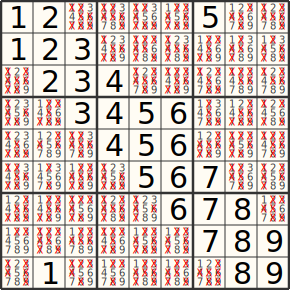

In [ ]:
display_once_per = 1                            # currently buggy to use larger values -- final state might not get drawn
simple_caller(visualizer=sudoku_callback)       # gives random nonsense sudoku puzzle states

## Ok, back to solving puzzles...

### --- Part 4 (a) --- The empty puzzle

If we look for the inferences we can make, given a completely blank puzzle...  we probably can't infer very much!

In [ ]:
do_exclusions_on_network(prepare_network(big_blank_sudoku_network()), [], visualizer = sudoku_callback);

Sure enough, no digits in the puzzle were narrowed down at all.

### --- Part 4 (b) --- The puzzle from the Wikipedia Sudoku page

In [ ]:
def puzzle_1_rels():
  _ = -1
  puzzle = [
      [   5,3,_,   _,7,_,   _,_,_   ],
      [   6,_,_,   1,9,5,   _,_,_   ],
      [   _,9,8,   _,_,_,   _,6,_   ],

      [   8,_,_,   _,6,_,   _,_,3   ],
      [   4,_,_,   8,_,3,   _,_,1   ],
      [   7,_,_,   _,2,_,   _,_,6   ],

      [   _,6,_,   _,_,_,   2,8,_   ],
      [   _,_,_,   4,1,9,   _,_,5   ],
      [   _,_,_,   _,8,_,   _,7,9   ],
    ]
  puzzle_rels = []
  for row_index, row in enumerate(puzzle) :
    for column_index, entry in enumerate(row) :
      if entry is not -1 :
        puzzle_rels.append(
          IS_ONE(factoid_var_name(entry, "is at", column_index + 1,
                                                     row_index + 1 )))
  return puzzle_rels

In [ ]:
do_exclusions_on_network( prepare_network(big_blank_sudoku_network()),
                          puzzle_1_rels(),
                          visualizer = sudoku_callback
);

Hooray, it solves the puzzle!  (If your code is correct.)

It's kind of funny that it starts displaying the big digit in a couple of the empty boxes before it finishes deducing that all of the _given_ information should be drawn in the boxes!  This is because it doesn't display the big digit until the network has propagated the fact that none of the other digits are there.  This happens twice as fast for a 5 (in the middle of our 1-of-9 network) as for a 1 or 9, so numbers around 5 tend to show up a little earlier while more extreme numbers tend to show up a little later.

### --- Part 4 (c) --- A "hard" puzzle from websudoku.com

In [ ]:
def puzzle_2_rels():
  _ = -1
  puzzle = [
      [   _,2,_,   _,_,_,   _,8,_   ],
      [   _,_,1,   5,9,_,   _,_,7   ],
      [   _,_,6,   _,3,_,   _,5,_   ],

      [   _,4,5,   _,8,_,   _,_,_   ],
      [   9,_,8,   _,_,_,   7,_,2   ],
      [   _,_,_,   _,6,_,   5,4,_   ],

      [   _,8,_,   _,7,_,   2,_,_   ],
      [   2,_,_,   _,4,3,   6,_,_   ],
      [   _,9,_,   _,_,_,   _,7,_   ],
    ]
  puzzle_rels = []
  for row_index, row in enumerate(puzzle) :
    for column_index, entry in enumerate(row) :
      if entry is not -1 :
        puzzle_rels.append(
          IS_ONE(factoid_var_name(entry, "is at", column_index + 1,
                                                     row_index + 1 )))
  return puzzle_rels

In [ ]:
do_exclusions_on_network( prepare_network(big_blank_sudoku_network()),
                          puzzle_2_rels(),
                          visualizer = sudoku_callback
);

We see the inference got stuck, kind of similar to how anybody can get stuck while working on a sudoku puzzle.

In [ ]:
do_exclusions_on_network( prepare_network(big_blank_sudoku_network()),
                          puzzle_2_rels() + [ IS_ONE(factoid_var_name(1,"is at",4,4)) ],
                          visualizer = sudoku_callback
);

So one guess is enough to solve it!

It was a lucky guess.  Would alternative guesses make it fail?

### --- Part 4 (d) --- A super-hard puzzle, "Everest", by Arto Inkala

In [ ]:
def puzzle_3_rels():
  _ = -1
  puzzle = [
      [   8,_,_,   _,_,_,   _,_,_   ],
      [   _,_,3,   6,_,_,   _,_,_   ],
      [   _,7,_,   _,9,_,   2,_,_   ],

      [   _,5,_,   _,_,7,   _,_,_   ],
      [   _,_,_,   _,4,5,   7,_,_   ],
      [   _,_,_,   1,_,_,   _,3,_   ],

      [   _,_,1,   _,_,_,   _,6,8   ],
      [   _,_,8,   5,_,_,   _,1,_   ],
      [   _,9,_,   _,_,_,   4,_,_   ],
    ]
  puzzle_rels = []
  for row_index, row in enumerate(puzzle) :
    for column_index, entry in enumerate(row) :
      if entry is not -1 :
        puzzle_rels.append(
          IS_ONE(factoid_var_name(entry, "is at", column_index + 1,
                                                     row_index + 1 )))
  return puzzle_rels

In [ ]:
do_exclusions_on_network( prepare_network(big_blank_sudoku_network()),
                          puzzle_3_rels(),
                          visualizer = sudoku_callback
);

How much did the inference engine figure out?

Can you write a backtracking search algorithm to find the solution and report how big of a search tree it needed?  (How deep and how many leaves?)